# **Pandas line plots**
---
A line plot is a type of graph that displays information as a series of data points, called `markers` connected by straight line segments.  
More on the documentation can be found here: [`Series.plot.line`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html), [`DataFrame.plot.line`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html) and  [`matplotlib.pyplot.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

>> Method call (applies for both `Dataframe` and `Series`):
+ `df.plot(x=None, y=None, **kwargs)`
+ `df.plot.line(x=None, y=None, **kwargs)`
+ `df.plot(kind="line", x=None, y=None, **kwargs)`  
>> + By default, `matplotlib` is used, hence `matplotlib` plotting keyword arguments can be passed, and `matplotlib` methods can be called to modify the plot

>> Arguments:
+ `x` - Allows plotting of one column versus another. If not specified, the index of the DataFrame is used.
+ `y` - Allows plotting of one column versus another. If not specified, all numerical columns are used.
+ `**kwargs` - Plotting key word arguments to be passed to [`matplotlib.pyplot.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) as well as additional keywords for [`DataFrame.plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot)

>> Returns: [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) or `np.ndarray` of them

### Making one plot on one Axes

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
# Specify the style sheet
plt.style.use("fast")

# Parse the Dataset into a DataFrame
ufos = pd.read_csv("/content/nuforc_reports.csv",
                   low_memory=False,
                   parse_dates=["date_time", "posted"])

# A little info about the DataFrame
ufos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88124 entries, 0 to 88123
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88094 non-null  object        
 1   city            87887 non-null  object        
 2   state           82889 non-null  object        
 3   date_time       86937 non-null  datetime64[ns]
 4   shape           85626 non-null  object        
 5   duration        84950 non-null  object        
 6   stats           88087 non-null  object        
 7   report_link     88124 non-null  object        
 8   text            88069 non-null  object        
 9   posted          86937 non-null  datetime64[ns]
 10  city_latitude   72012 non-null  float64       
 11  city_longitude  72012 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 8.1+ MB


In [ ]:
# Filter by of UFO sightings in California (CA)
ufos[ufos["state"]=="CA"]

In [ ]:
# Get annual sightings in CA
CA_annual = ufos[ufos["state"]=="CA"]["date_time"].dt.year.value_counts().sort_index()

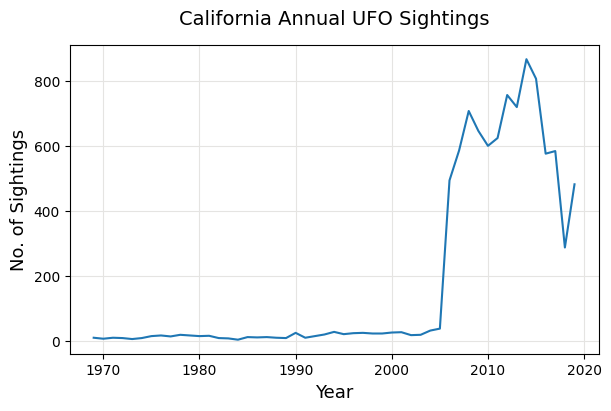

In [ ]:
# Plot the Series gotten from above
plt.figure(figsize=(6,4), layout="constrained")
CA_annual.plot()

# Customize using matplotlib methods
plt.ylabel("No. of Sightings", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.title("California Annual UFO Sightings", pad=15, fontsize=14)
plt.grid(visible=True, color="#e5e4e2")

plt.show()

### Making multiple plots on one Axes
> + Multiple plots can be achieved by making more than one plotting call on the same figure


In [ ]:
# Texas (TX) state annual UFO sightings
TX_annual = ufos[ufos["state"]=="TX"]["date_time"].dt.year.value_counts().sort_index()

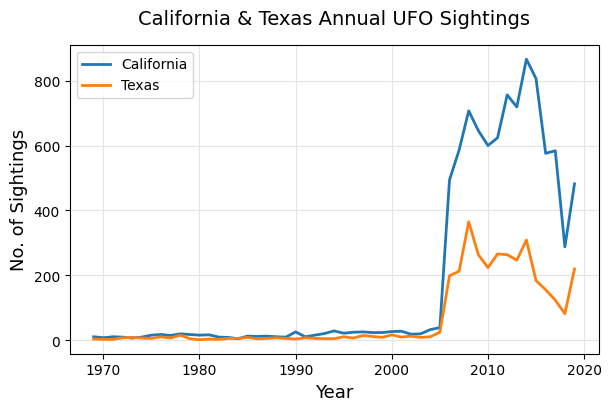

In [ ]:
# Plot the Texas and California Series on one plot
plt.figure(figsize=(6,4), layout="constrained")
"""
  Multiple plots can be achieved by making more than one plot in the same figure
"""
CA_annual.plot(label="California", linewidth=2)
TX_annual.plot(label="Texas", linewidth=2)

# Customize using matplotlib methods
plt.ylabel("No. of Sightings", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.title("California & Texas Annual UFO Sightings", pad=15, fontsize=14)
plt.grid(visible=True, color="#e5e4e2")

plt.legend(facecolor="#ffffff", fancybox=True)

plt.show()

# **Exercise 1!** 💪 💪 💪
---
Work with  `pandas` and the `nuforc_reports.csv` dataset to generate the `UFO_shapes.png` pie plot in the `pics` folder.
+ It represents UFO sightings by Shape from 2000 - 2018
+ The UFO shapes are `['light', 'fireball', 'circle', 'triangle', 'formation']`

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
# Specify the style sheet
plt.style.use("fast")

# Parse the Dataset into a DataFrame
ufos = pd.read_csv("/content/nuforc_reports.csv",
                   low_memory=False,
                   parse_dates=["date_time", "posted"])

# A little info about the DataFrame
ufos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88124 entries, 0 to 88123
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88094 non-null  object        
 1   city            87887 non-null  object        
 2   state           82889 non-null  object        
 3   date_time       86937 non-null  datetime64[ns]
 4   shape           85626 non-null  object        
 5   duration        84950 non-null  object        
 6   stats           88087 non-null  object        
 7   report_link     88124 non-null  object        
 8   text            88069 non-null  object        
 9   posted          86937 non-null  datetime64[ns]
 10  city_latitude   72012 non-null  float64       
 11  city_longitude  72012 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 8.1+ MB


In [ ]:
# Filter the DataFrame by sightings from 2000 - 2018
subset = ufos[ufos["date_time"].dt.year.between(2000, 2018, inclusive="both")]

In [ ]:
# Annual UFO sightings for 'light', 'fireball', 'circle', 'triangle', 'formation':
light = subset[subset["shape"]=="light"]["date_time"].dt.year.value_counts().sort_index()
fireball = subset[subset["shape"]=="fireball"]["date_time"].dt.year.value_counts().sort_index()
circle = subset[subset["shape"]=="circle"]["date_time"].dt.year.value_counts().sort_index()
triangle = subset[subset["shape"]=="triangle"]["date_time"].dt.year.value_counts().sort_index()
formation = subset[subset["shape"]=="formation"]["date_time"].dt.year.value_counts().sort_index()

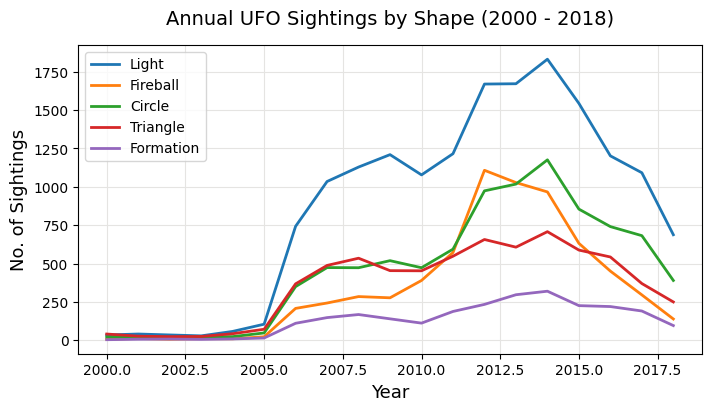

In [ ]:
# Plot the UFo Shape Series on one plot
plt.figure(figsize=(7,4), layout="constrained")
"""
  Multiple plots can be achieved by making more than one plot call on the same figure
"""
light.plot(label="Light", linewidth=2)
fireball.plot(label="Fireball", linewidth=2)
circle.plot(label="Circle", linewidth=2)
triangle.plot(label="Triangle", linewidth=2)
formation.plot(label="Formation", linewidth=2)

# Customize using matplotlib methods
plt.ylabel("No. of Sightings", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.title("Annual UFO Sightings by Shape (2000 - 2018)", pad=15, fontsize=14)
plt.grid(visible=True, color="#e5e4e2")

plt.legend(facecolor="#ffffff", fancybox=True)

plt.show()

# **Exercise 2!** 💪 💪 💪
---
Work with  `pandas` and the `billboard_charts.csv` dataset to generate the `blinding_lights.png` pie plot in the `pics` folder.
> + It visualizes the performance of the song `Blinding Lights` by `The Weekend`

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
# Specify the style sheet
plt.style.use("fast")

# Parse the Dataset into a DataFrame
charts = pd.read_csv("/content/billboard_charts.csv",
                   parse_dates=["date"],
                     index_col="date")

# A little info about the DataFrame
charts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330087 entries, 2021-11-06 to 1958-08-04
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   rank            330087 non-null  int64  
 1   song            330087 non-null  object 
 2   artist          330087 non-null  object 
 3   last-week       297775 non-null  float64
 4   peak-rank       330087 non-null  int64  
 5   weeks-on-board  330087 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 17.6+ MB


In [ ]:
# Filter the DataFrame by the song Blinding Lights and artist The Weeknd
mask = (charts["song"]=="Blinding Lights") & (charts["artist"]=="The Weeknd")
# Get the rank column of the filtered DataFrame and sort it by index
charts[mask]["rank"].sort_index()

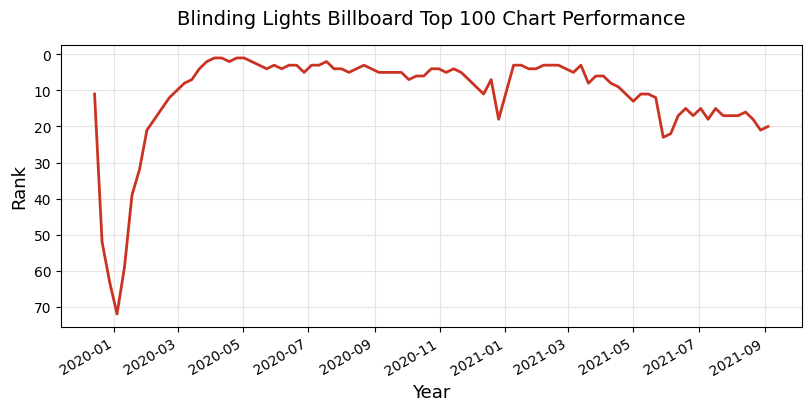

In [ ]:
# Plot the rank column
plt.figure(figsize=(8,4), layout="constrained")
charts[mask]["rank"].sort_index().plot(linewidth=2, color="#CA3322")

# Customize using matplotlib methods
plt.ylabel("Rank", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.title("Blinding Lights Billboard Top 100 Chart Performance", fontsize=14, pad=15)
plt.grid(visible=True, color="#e5e4e2")
# Invert yaxis
plt.gca().invert_yaxis()

plt.show()